In [1]:
from pathlib import Path
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

## **Basic Markdown**
    - BestPratice: https://www.markdownguide.org/basic-syntax/

## **List folder data kaggle**
    - Data folder
        - train.csv 
        - test.csv 
        - gender_submission.csv

In [3]:
"""
    # Declare datapath  
"""

path_Root = Path().resolve() # Root Path
path_Dataset = path_Root / "Data" # contain Data folder
path_specific_folder_Data = path_Dataset / "Titanic"


print("==========" * 3)
print(f"Root path: {path_Root}")
print(f"Data Spectification folder: {path_specific_folder_Data}")
print("==========" * 3)

Root path: /Users/thaihoc/Desktop/kaggle
Data Spectification folder: /Users/thaihoc/Desktop/kaggle/Data/Titanic


In [4]:
"""
    # List file data 
"""
list_file = path_specific_folder_Data.glob('*.csv') # list all file csv 

print("List all file CSV in Kaggle competion provide.")
for name in list_file:
    print(f"  - {name}")

List all file CSV in Kaggle competion provide.
  - /Users/thaihoc/Desktop/kaggle/Data/Titanic/test.csv
  - /Users/thaihoc/Desktop/kaggle/Data/Titanic/train.csv
  - /Users/thaihoc/Desktop/kaggle/Data/Titanic/gender_submission.csv


## Function support project ##
    - Read_Data

In [5]:
def read_file(pathfile):
    return pd.read_csv(pathfile)

In [6]:
def barchar(data):
    fig, axes = plt.subplots(figsize=(5, 5))
    data.plot(kind='bar', ax=axes, stacked=True)

## Read Data ##

In [7]:
"""
    # Read Data 
"""

path_train = path_specific_folder_Data / "train.csv"
path_test = path_specific_folder_Data / "test.csv"


df_train = read_file(path_train)
df_test = read_file(path_test)

In [11]:
# list some record 
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Descripe column**

1. `PassengerId`: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

2. `Survived`: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

3. `Pclass`: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

4. `Name`: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

5. `Sex`: Passenger's sex. It's either Male or Female.

6. `Age`: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

7. `SibSp`: Number of siblings or spouses travelling with each passenger.

8. `Parch`: Number of parents of children travelling with each passenger.

9. `Ticket`: Ticket number.

10. `Fare`: How much money the passenger has paid for the travel journey.

11. `Cabin`: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that 12 12. particular passenger has not been recorded.

12. `Embarked`: Port from where the particular passenger was embarked/boarded.


### Finding relations between features and survival¶
    a) Pclass vs Survival

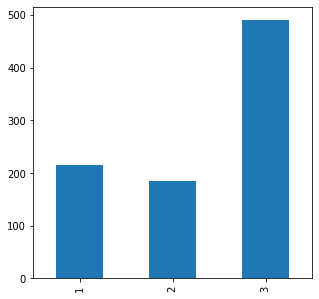

In [31]:
barchar(df_train.Pclass.value_counts().sort_index())

In [36]:
pclass_survived = df_train.groupby('Pclass').Survived.value_counts()
pclass_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived'>

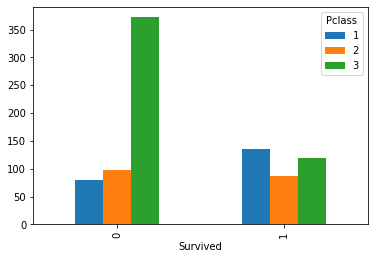

In [37]:
pclass_survived.unstack(level=0).plot(kind='bar', subplots=False)

NOTE

    * Ta thấy rằng ở TH không sống sót "0" thì hành khách ở ticket 3 chết nhiều hơn.

In [44]:
pclass_survived_average = df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
pclass_survived_average


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:>

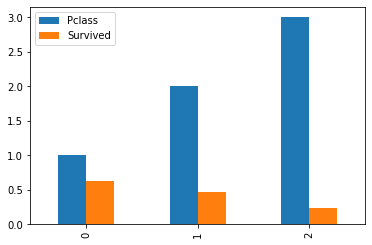

In [49]:
pclass_survived_average.plot(kind='bar', subplots=False)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

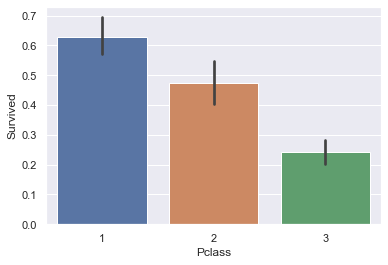

In [54]:
sns.barplot(x='Pclass', y='Survived', data=df_train)

    b) Sex vs Survial

In [56]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [58]:
#  Số người nam hay nữ sống hay chết là bao nhiêu.
sex_survival = df_train.groupby('Sex').Survived.value_counts()
sex_survival

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived'>

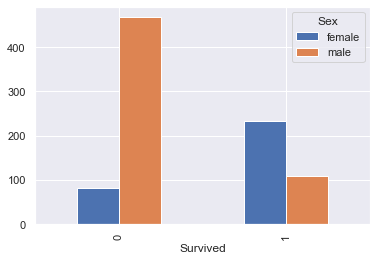

In [60]:
sex_survival.unstack(level=0).plot(kind='bar', subplots=False)

NOTE

    * Chuyến tàu này nhiều nam hơn nữa 
    * Nam chết nhiều hơn số lượng nữ 

In [62]:
# ti le trung binh nam hay nữ 

sex_survived_average = df_train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()
sex_survived_average


,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:>

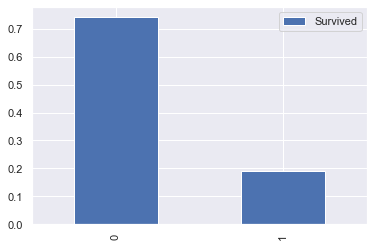

In [63]:
sex_survived_average.plot(kind='bar', subplots=False)


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

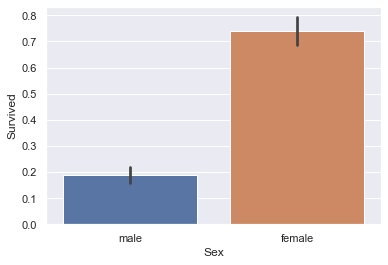

In [64]:
sns.barplot(x='Sex', y='Survived', data=df_train)


    c) Pclass & Sex vs Survival

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

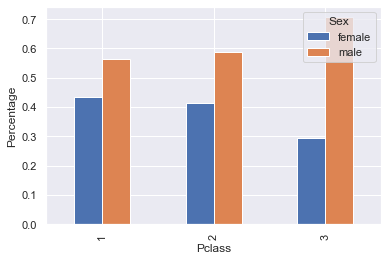

In [72]:
tab = pd.crosstab(df_train['Pclass'], df_train['Sex'])
print(tab)

# sum(1) means the sum across axis 1.
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

In [67]:
pclass_sex_survival = df_train.groupby(['Pclass', 'Sex']).Survived.value_counts()
pclass_sex_survival


Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

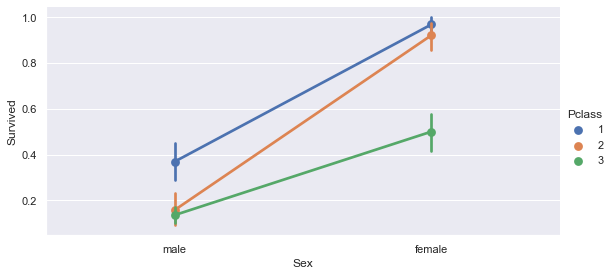

In [74]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=df_train)



### Plotting some distribution plots based on survival's sex


In [11]:
total_survived = df_train[df_train['Survived']==1]
total_not_survived = df_train[df_train['Survived']==0]

male_survived = df_train[(df_train['Survived']==1) & (df_train['Sex']=="male")]
female_survived = df_train[(df_train['Survived']==1) & (df_train['Sex']=="female")]

male_not_survived = df_train[(df_train['Survived']==0) & (df_train['Sex']=="male")]
female_not_survived = df_train[(df_train['Survived']==0) & (df_train['Sex']=="female")]

(array([34.,  8., 40., 48., 60., 45., 17., 22., 11.,  4.,  0.,  1.]),
 array([ 0.42      ,  7.05166667, 13.68333333, 20.315     , 26.94666667,
        33.57833333, 40.21      , 46.84166667, 53.47333333, 60.105     ,
        66.73666667, 73.36833333, 80.        ]),
 <BarContainer object of 12 artists>)

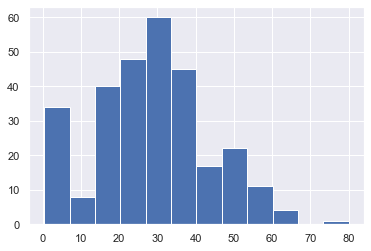

In [15]:
plt.hist(total_survived['Age'].dropna().values, bins = int(180/15))

Text(0, 0.5, 'Values')

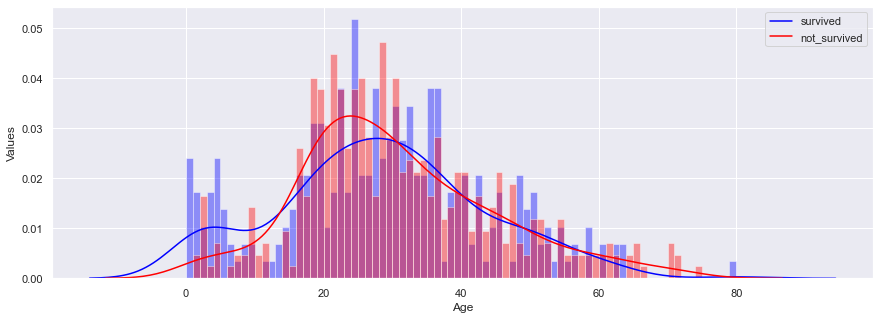

In [37]:
fig = plt.figure(figsize=(50,5))
ax1 = fig.add_subplot(131)

sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue', ax=ax1)
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', ax=ax1)
plt.legend(['survived', 'not_survived'])
plt.xlabel('Age')
plt.ylabel('Values')


<AxesSubplot:xlabel='Male Age', ylabel='Density'>

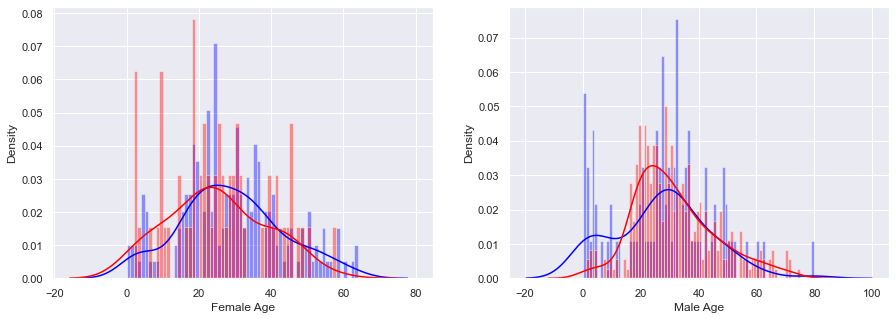

In [38]:
plt.figure(figsize=[15,5])

plt.subplot(121)


Text(0, 0.5, 'Values')

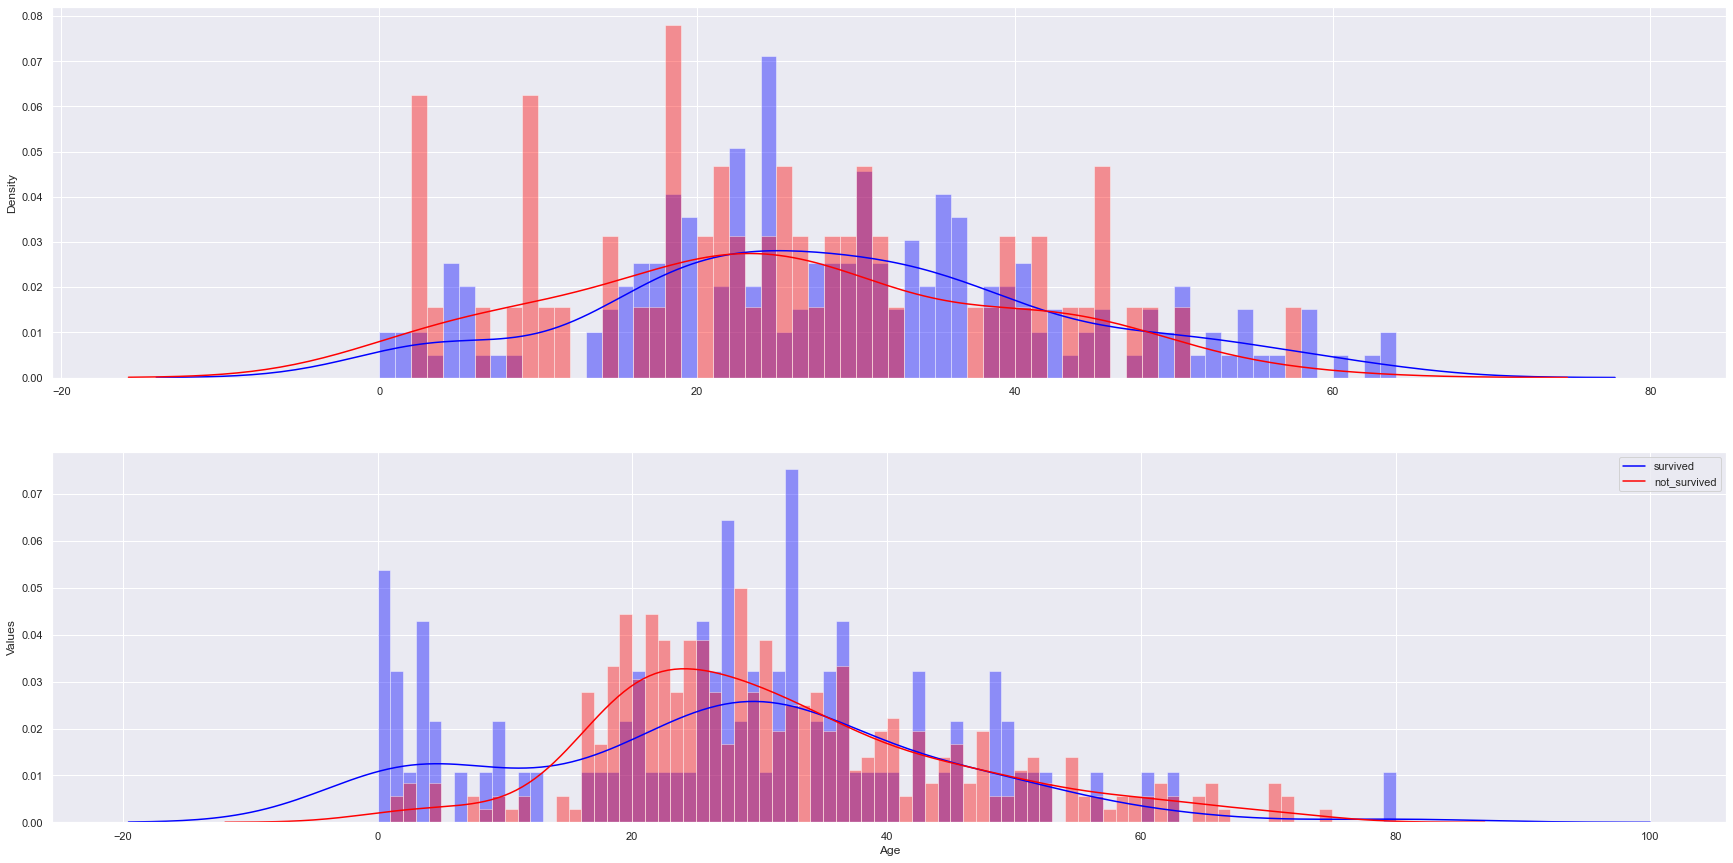

In [56]:
fig, axes = plt.subplots(nrows=2, figsize=(30, 15))

sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue', ax=axes[0])
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', ax=axes[0])

sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue', ax=axes[1])
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', ax=axes[1])

plt.legend(['survived', 'not_survived'])
plt.xlabel('Age')
plt.ylabel('Values')


### Correlating Features¶


In [57]:
df_train.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

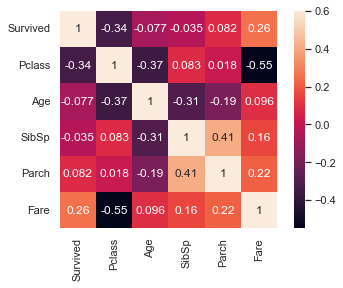

In [58]:
sns.heatmap(df_train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

NOTE:

    Heatmap of Correlation between different features:

> **Positive numbers** = Positive correlation, i.e. increase in one feature will increase the other feature & vice-versa.

> **Negative numbers** = Negative correlation, i.e. increase in one feature will decrease the other feature & vice-versa.

    In our case, we focus on which features have strong positive or negative correlation with the Survived feature.

## Feature Extraction

In [62]:
train_test_data = [df_train, df_test]


for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.')

In [68]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    


In [71]:
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


<AxesSubplot:xlabel='Title', ylabel='Survived'>

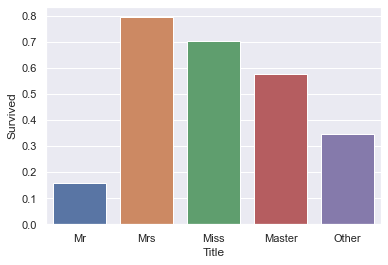

In [72]:
sns.barplot(x='Title', y='Survived', ci=None, data=df_train)


In [73]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [77]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

In [79]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [80]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    

In [85]:
df_train['AgeBand'] = pd.cut(df_train['Age'], 5)

print(df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.540541
1   (16.0, 32.0]  0.350562
2   (32.0, 48.0]  0.372549
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [86]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [88]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(df_train['Fare'].median())

In [90]:
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)
print (df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [91]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [93]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print(df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())


   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

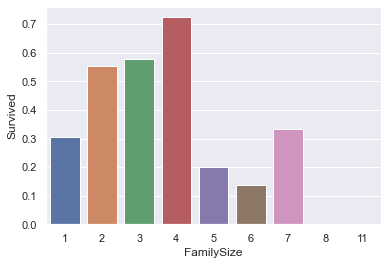

In [95]:
sns.barplot(x='FamilySize', y='Survived', ci=None, data=df_train)


In [97]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (df_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [99]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
df_train = df_train.drop(features_drop, axis=1)
df_test = df_test.drop(features_drop, axis=1)
df_train = df_train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [101]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']
X_test = df_test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [102]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone'], dtype='object')